In [5]:
import csv
from scipy.stats import mode, spearmanr
import numpy as np
from collections import defaultdict
from matplotlib import pyplot as plt
import pandas as pd

In [13]:
def read_file(f): 
    d = {}
    with open(f, 'r') as infile: 
        for line in infile: 
            contents = line.strip().split(',')
            d[tuple(sorted([contents[0], contents[1]]))] = contents[2]
    return d
def write_combined_file(): 
    path = '../logs/similarities/'
    user_d = read_file(path + 'user.csv')
    text_d = read_file(path + 'text.csv')
    sent_d = read_file(path + 'sent.csv')
    with open(path + 'combined.csv', 'w') as outfile: 
        outfile.write('SUB1,SUB2,USER,TEXT,SENT\n')
        for pair in user_d.keys(): 
            outfile.write(pair[0] + ',' + pair[1] + ',' + \
                          user_d[pair] + ',' + text_d[pair] + ',' + sent_d[pair] + '\n')
write_combined_file()

In [14]:
# look at some of the biggest differences between two subreddits
def compare_two(sr1, sr2):
    path = '../logs/socialsent_lexicons_ppmi_svd_top5000_old/'
    scores1 = {}
    scores2 = {}
    with open(path + sr1 + '.txt', 'r') as infile: 
        for line in infile: 
            contents = line.strip().split('\t')
            scores1[contents[0]] = float(contents[1])
    with open(path + sr2 + '.txt', 'r') as infile: 
        for line in infile: 
            contents = line.strip().split('\t')
            scores2[contents[0]] = float(contents[1])
    vocab = sorted(set(scores1.keys()) & set(scores2.keys()))
    for k in scores1.keys(): 
        if k not in vocab: 
            scores1.pop(k, None)
    for k in scores2.keys(): 
        if k not in vocab: 
            scores2.pop(k, None)
    vocab = np.array(vocab, dtype=object)
    first = np.array([scores1[k] for k in sorted(scores1)])
    second = np.array([scores2[k] for k in sorted(scores2)])
    diff = first - second
    idx = np.argsort(diff)
    lowest = idx[:15]
    highest = idx[-15:]
    print "Comparing " + sr2 + " and " + sr1 + ":"
    print "Much higher in " + sr2, vocab[lowest] 
    print "Much higher in " + sr1, vocab[highest] 
compare_two('femalefashionadvice', 'malefashionadvice')
print
compare_two('askgaybros', 'actuallesbians')
print
compare_two('femalefashionadvice', 'xxfitness')
print
compare_two('mensrights', 'malefashionadvice')
print
compare_two('xxfitness', 'trollxchromosomes')
print
compare_two('femalefashionadvice', 'trollxchromosomes')

Comparing malefashionadvice and femalefashionadvice:
Much higher in malefashionadvice ['sick' 'impressive' 'weak' 'enjoy' 'doctor' 'intense' 'stories' 'killed'
 'rough' 'experienced' 'relationship' 'dealing' 'waiting' 'dropped'
 'period']
Much higher in femalefashionadvice ['banned' 'wednesday' 'rant' 'nailed' 'handmade' 'yes' 'jumper' 'meh'
 'jealous' 'freaking' 'esp' 'dream' 'tuesdays' 'condition' 'magic']

Comparing actuallesbians and askgaybros:
Much higher in actuallesbians ['hilarious' 'absolutely' 'sounds' 'funny' 'freaking' 'cold' 'cat' 'such'
 'fabulous' 'top' 'true' 'smells' 'piece' 'thatd' 'gosh']
Much higher in askgaybros ['imply' 'acceptable' 'disagree' 'reasonable' 'fox' 'claim' 'irrelevant'
 'biased' 'standard' 'statistics' 'logic' 'arguments' 'statements'
 'accurate' 'claims']

Comparing xxfitness and femalefashionadvice:
Much higher in xxfitness ['died' 'impressive' 'hot' 'form' 'gal' 'teenager' 'posture' 'lighting'
 'legit' 'child' 'stories' 'learn' 'movement' 'childr

In [15]:
df = pd.read_csv('../logs/similarities/combined.csv') #USER TEXT SENT

In [16]:
#Text User
print "TEXT vs USER"
print spearmanr(df['TEXT'],df['USER'])
print "TEXT vs SENT"
print spearmanr(df['TEXT'],df['SENT'])
print "USER vs SENT"
print spearmanr(df['USER'],df['SENT'])



TEXT vs USER
SpearmanrResult(correlation=0.42676962676962676, pvalue=0.0094392807294647919)
TEXT vs SENT
SpearmanrResult(correlation=0.63706563706563701, pvalue=2.9430869768677065e-05)
USER vs SENT
SpearmanrResult(correlation=0.42187902187902193, pvalue=0.010382324643072583)


askgaybros malefashionadvice 0.390144415 0.367341638547
actuallesbians askwomen 0.638594836 0.688783545604
askgaybros trollxchromosomes 0.846588351 0.0484306629905
femalefashionadvice malefashionadvice 0.903900236 0.16066039391
askgaybros askmen 0.567242642 0.437232092901
askmen xxfitness 0.27069039 0.0714059488062
femalefashionadvice mensrights 0.235286935 0.0299283001229
askmen trollxchromosomes 0.416155247 -0.0549021052708
actuallesbians askmen 0.529140916 0.00375741234215
askwomen mensrights 0.332996084 0.0811415706044
askmen femalefashionadvice 0.259714016 0.0676078348525
malefashionadvice xxfitness 0.381214657 0.0352016099532
actuallesbians mensrights 0.66925171 0.143247318154
askmen askwomen 0.287414947 0.416849814189
malefashionadvice mensrights 0.196173406 0.0905475600684
mensrights xxfitness 0.207661007 0.0624880167823
actuallesbians askgaybros 0.927813889 0.323916907287
mensrights trollxchromosomes 0.684212054 0.06687327154
askwomen femalefashionadvice 0.479805965 0.48090821

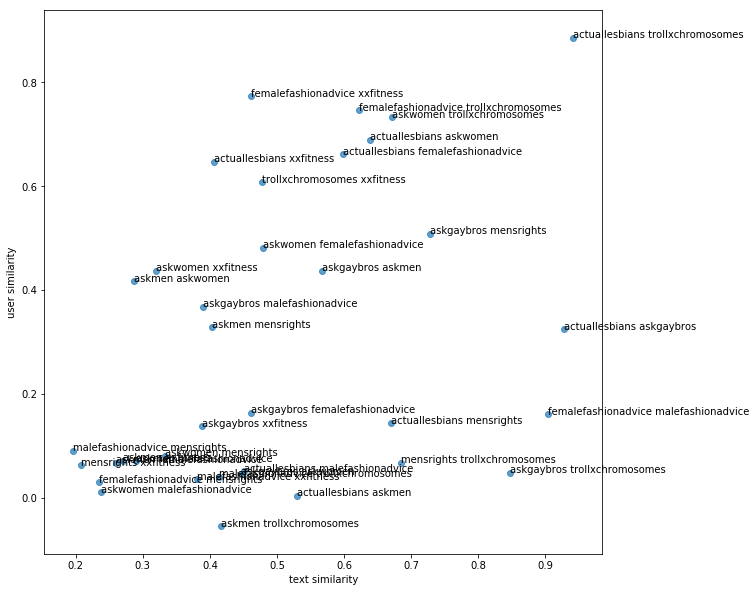

In [20]:
plt.figure(figsize=(10,10))
plt.scatter(df['TEXT'], df['USER'],alpha=0.7)
plt.xlabel('text similarity')
plt.ylabel('user similarity')
ax = plt.gca()
for i in range(len(df['TEXT'])): 
    ax.annotate(df['SUB1'][i] + ' ' + df['SUB2'][i], (df['TEXT'][i],df['USER'][i]))
    print df['SUB1'][i] + ' ' + df['SUB2'][i], df['TEXT'][i],df['USER'][i]
plt.show()

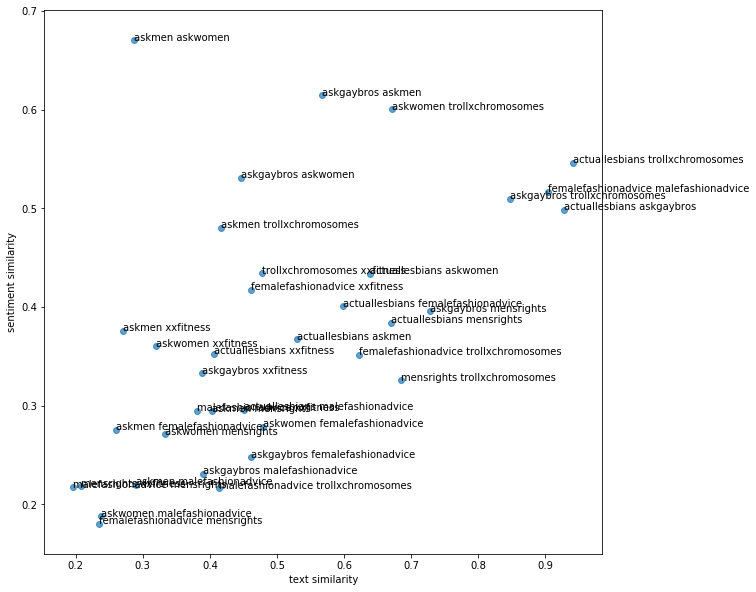

In [21]:
plt.figure(figsize=(10,10))
plt.scatter(df['TEXT'], df['SENT'],alpha=0.7)
plt.xlabel('text similarity')
plt.ylabel('sentiment similarity')
ax = plt.gca()
for i in range(len(df['TEXT'])): 
    ax.annotate(df['SUB1'][i] + ' ' + df['SUB2'][i], (df['TEXT'][i],df['SENT'][i]))
plt.show()
plt.close()

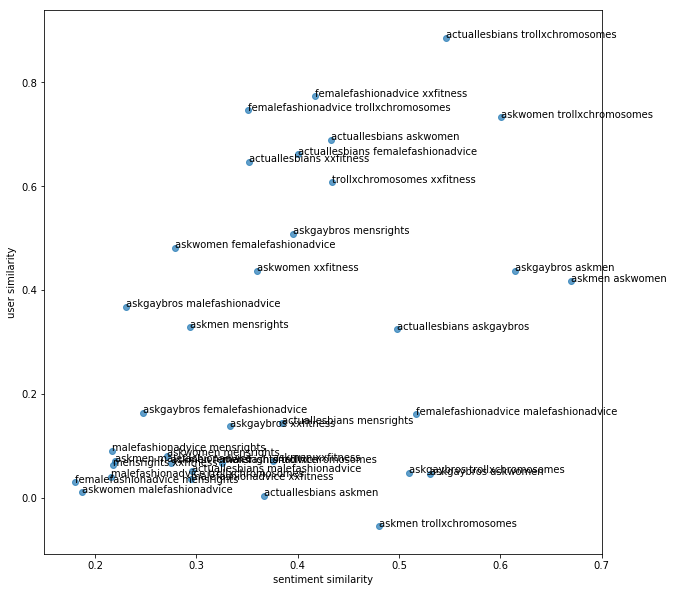

In [22]:
plt.figure(figsize=(10,10))
plt.scatter(df['SENT'], df['USER'],alpha=0.7)
plt.xlabel('sentiment similarity')
plt.ylabel('user similarity')
ax = plt.gca()
for i in range(len(df['SENT'])): 
    ax.annotate(df['SUB1'][i] + ' ' + df['SUB2'][i], (df['SENT'][i],df['USER'][i]))
plt.show()

In [30]:
sent_sort = np.argsort(np.array(df['SENT']))
sub1 = df['SUB1']
sub2 = df['SUB2']
for i in range(len(sent_sort)):
    if i < 10: 
        print "low", sub1[sent_sort[i]], sub2[sent_sort[i]], df['SENT'][sent_sort[i]]
    if i > len(sent_sort) - 11: 
        print "high", sub1[sent_sort[i]], sub2[sent_sort[i]], df['SENT'][sent_sort[i]]
print "average sent", np.mean(np.array(df['SENT']))
print "average user", np.mean(np.array(df['USER']))

low femalefashionadvice mensrights 0.180238506316
low askwomen malefashionadvice 0.18762007757
low malefashionadvice trollxchromosomes 0.216239196423
low malefashionadvice mensrights 0.217003858945
low mensrights xxfitness 0.218073266959
low askmen malefashionadvice 0.21946055852
low askgaybros malefashionadvice 0.230961830394
low askgaybros femalefashionadvice 0.247507639703
low askwomen mensrights 0.27099564347
low askmen femalefashionadvice 0.27539824935
high trollxchromosomes xxfitness 0.434261827287
high askmen trollxchromosomes 0.480419697246
high actuallesbians askgaybros 0.498338020907
high askgaybros trollxchromosomes 0.509638839935
high femalefashionadvice malefashionadvice 0.516649089782
high askgaybros askwomen 0.531002897803
high actuallesbians trollxchromosomes 0.546234678278
high askwomen trollxchromosomes 0.600343799143
high askgaybros askmen 0.61444094955
high askmen askwomen 0.67019322638
average sent 0.370085132732
average user 0.287955067797


In [25]:
from sklearn.decomposition import PCA

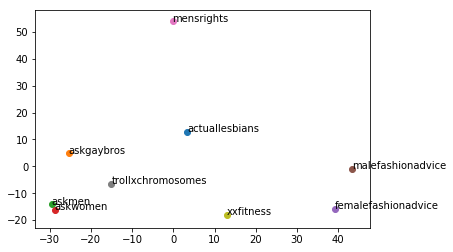

In [29]:
def pca(vector_folder): 
    subreddit_list = sorted(['femalefashionadvice','malefashionadvice','mensrights','trollxchromosomes',\
                             'actuallesbians','askmen','askwomen','askgaybros','xxfitness'])
    X = []
    for sr in subreddit_list: 
        X.append(np.load(vector_folder + sr + '.npy'))
    X = np.array(X)
    pca = PCA(n_components=2)
    X_r = pca.fit(X).transform(X)
    for i in range(len(subreddit_list)):
        plt.scatter(X_r[i,0], X_r[i,1])
        plt.annotate(subreddit_list[i],(X_r[i,0], X_r[i,1]))
    plt.show()
pca('../logs/socialsent_vectors_ppmi_svd_top5000_old/')

In [45]:
import glob
import os
from sklearn import preprocessing

lexicon_files = glob.glob('../logs/socialsent_lexicons_ppmi_svd_top5000/*.txt')

In [46]:
def normalize_lexicon(f):
    sent_dict = {}
    scaled_sent_dict = {}
    with open(f,'r') as f:
        tsvin = csv.reader(f,delimiter='\t')
        for line in tsvin:
            sent_dict[line[0]] = float(line[1])
    words_ordered = sorted(sent_dict.keys())
    sents_ordered = [sent_dict[w] for w in words_ordered]
    sents_ordered_norm = preprocessing.scale(sents_ordered)

    for i in range(len(words_ordered)):
        w = words_ordered[i]
        scaled_sent_dict[w] = float(sents_ordered_norm[i])
    return scaled_sent_dict

def get_bootstrapped_lexicon(f):
    sent_dict = {}
    with open(f,'r') as f:
        tsvin = csv.reader(f,delimiter='\t')
        for line in tsvin:
            sent_dict[line[0]] = float(line[1])
    return sent_dict

In [47]:
def get_sentiments(word):
    x = []
    for f in lexicon_files:
        subreddit = os.path.basename(f)[:-4]
        scaled_sent_dict = get_bootstrapped_lexicon(f)
        if word in scaled_sent_dict:
            x.append((scaled_sent_dict[word],subreddit))
    for elem in sorted(x,reverse=True):
        print elem

In [48]:
get_sentiments('brothers')

(1.91843344411, 'mensrights')
(0.778663205022, 'askgaybros')
(0.5364918637, 'askmen')
(0.477997128069, 'actuallesbians')
(0.348159956846, 'askwomen')
(0.262767260189, 'trollxchromosomes')
(0.175460596288, 'malefashionadvice')
(-0.26689284177, 'femalefashionadvice')


In [49]:
get_sentiments('brother')

(1.89400082687, 'mensrights')
(0.817576342389, 'askgaybros')
(0.533198177156, 'askmen')
(0.517871832591, 'actuallesbians')
(0.338822324303, 'malefashionadvice')
(0.256206179456, 'trollxchromosomes')
(0.251048810044, 'askwomen')
(0.233248980736, 'xxfitness')
(-0.483515123295, 'femalefashionadvice')


In [173]:
get_sentiments('outfit')

(2.72283046928, 'femalefashionadvice')
(1.60551949148, 'trollxchromosomes')
(1.34394888283, 'xxfitness')
(1.2076785895, 'askwomen')
(1.12489784671, 'askmen')
(1.07664540581, 'malefashionadvice')
(0.670985187347, 'actuallesbians')


In [162]:
get_sentiments('men')

(0.491329338842, 'malefashionadvice')
(0.27192373909, 'xxfitness')
(0.192018346609, 'askgaybros')
(-0.137912219045, 'trollxchromosomes')
(-0.185646674691, 'actuallesbians')
(-0.296289090253, 'askmen')
(-0.324583173812, 'femalefashionadvice')
(-0.489107256142, 'askwomen')
(-0.897740617285, 'mensrights')


In [68]:
get_sentiments('omg')

(2.36367317829, 'femalefashionadvice')
(2.25193088606, 'actuallesbians')
(2.09087381214, 'trollxchromosomes')
(1.94377572304, 'xxfitness')
(0.978544598767, 'askwomen')
(0.904487260843, 'malefashionadvice')
(0.365495207161, 'mensrights')
(0.23253840634, 'askgaybros')
(-0.488657198975, 'askmen')


In [52]:
get_sentiments('women')

(0.386961019853, 'xxfitness')
(0.339490667249, 'askgaybros')
(0.223229276217, 'femalefashionadvice')
(0.190347533463, 'malefashionadvice')
(-0.0948667385016, 'trollxchromosomes')
(-0.169788305296, 'askmen')
(-0.178593520305, 'actuallesbians')
(-0.286708085483, 'askwomen')
(-0.662225837682, 'mensrights')


In [53]:
get_sentiments('feminists')

(-0.115793440417, 'askmen')
(-0.218957811201, 'trollxchromosomes')
(-0.282379337123, 'askwomen')
(-1.9074209353, 'mensrights')
(-2.07736319367, 'actuallesbians')


In [54]:
get_sentiments('ladies')

(1.77113437916, 'trollxchromosomes')
(1.53145347269, 'mensrights')
(1.47538638151, 'actuallesbians')
(1.3130616934, 'xxfitness')
(0.814558424866, 'femalefashionadvice')
(0.368942534685, 'askgaybros')
(-0.0634426622739, 'malefashionadvice')
(-0.185778436653, 'askmen')
(-0.315224388302, 'askwomen')


In [55]:
get_sentiments('cute')

(2.97361599661, 'femalefashionadvice')
(2.52007085583, 'xxfitness')
(2.51717523517, 'askwomen')
(2.4712673343, 'actuallesbians')
(2.05341314788, 'askmen')
(1.84850534691, 'askgaybros')
(1.65635039033, 'trollxchromosomes')
(1.30965434913, 'mensrights')
(0.720580642537, 'malefashionadvice')


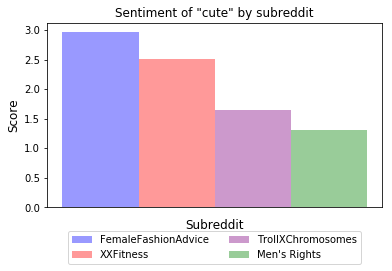

In [57]:
n_groups = 1
#femalefashioadvice,xxfitness,trollxchromosomes,mensrights

ffa = (2.97361599661)
xx = (2.52007085583)
troll = (1.65635039033)
men = (1.30965434913)

# means_men = (20, 35, 30, 35, 27)
# std_men = (2, 3, 4, 1, 2)

# means_women = (25, 32, 34, 20, 25)
# std_women = (3, 5, 2, 3, 3)

fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.24) # <-- Change the 0.02 to work for your plot.

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, ffa, bar_width,
                alpha=opacity, color='b',
                
                label='FemaleFashionAdvice')

rects2 = ax.bar(index + bar_width, xx, bar_width,
                alpha=opacity, color='r',

                label='XXFitness')

rects2 = ax.bar(index + 2*bar_width, troll, bar_width,
                alpha=opacity, color='purple',
                
                label='TrollXChromosomes')

rects2 = ax.bar(index + 3*bar_width, men, bar_width,
                alpha=opacity, color='g',
                
                label='Men\'s Rights')

ax.set_xlabel('Subreddit',fontsize=12)
ax.set_ylabel('Score',fontsize=12)
ax.set_title('Sentiment of "cute" by subreddit')
#ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(())
ax.xaxis.set_ticks_position('none') 

ax.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=2,fontsize=10)

#fig.tight_layout()
plt.savefig('sentiment_cute.pdf')
plt.show()


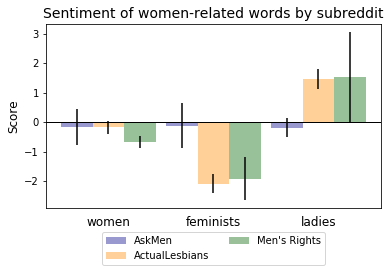

In [67]:
n_groups = 3
#femalefashioadvice,xxfitness,trollxchromosomes,mensrights

askmen = (-0.169788305296,-0.115793440417,-0.185778436653)
act = (-0.178593520305,-2.07736319367,1.47538638151)
men = (-0.662225837682,-1.9074209353,1.53145347269)
askmen_err = (0.605648314375,0.760331522561,0.329202826643)
act_err = (0.210861732158,0.309983948425,0.336708929691)
men_err = (0.211873788062,0.726378230946,1.50880983009)


fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.24) # <-- Change the 0.02 to work for your plot.

index = np.arange(n_groups)
bar_width = 0.3

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, askmen, bar_width,
                alpha=opacity, color='darkblue', yerr=askmen_err,
                label='AskMen')

rects2 = ax.bar(index + bar_width, act, bar_width,
                alpha=opacity, color='darkorange', yerr=act_err,

                label='ActualLesbians')

rects3 = ax.bar(index + 2*bar_width, men, bar_width,
                alpha=opacity, color='darkgreen', yerr=men_err,
                
                label="Men\'s Rights")


#ax.set_xlabel('Subreddit')
ax.axhline(0, color='black',lw=1)

ax.set_ylabel('Score',fontsize=12)
ax.set_title('Sentiment of women-related words by subreddit',fontsize=14)
ax.set_xticks(index + bar_width)
ax.set_xticklabels(('women','feminists','ladies'),fontsize=12)
ax.xaxis.set_ticks_position('none') 

ax.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=2,fontsize=10)

#fig.tight_layout()
plt.savefig('sentiment_women.pdf')
plt.show()


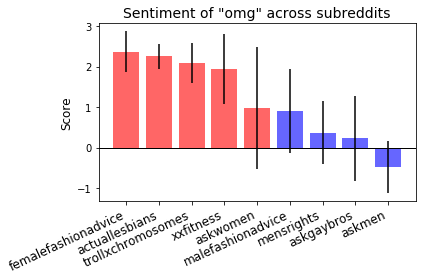

In [136]:
x_labels = ['femalefashionadvice', 'actuallesbians', \
'trollxchromosomes', 'xxfitness', 'askwomen', 'malefashionadvice', 'mensrights', 'askgaybros', 'askmen']
values = [2.36367317829, 2.25193088606, 2.09087381214, 1.94377572304, 0.978544598767, \
          0.904487260843, 0.365495207161, 0.23253840634, -0.488657198975]
y_err = [0.505792411868, 0.3045783104, 0.490553430559, 0.865289224605, 1.5024445018, 
         1.03250828668, 0.783531577156, 1.04966162921, 0.637723348866]

barlist = plt.bar(np.arange(len(x_labels)), values, alpha=0.6, tick_label=x_labels, color=['red']*5 + ['blue']*4, yerr=y_err)
plt.axhline(0, color='black',lw=1)
plt.xticks(rotation=25,ha='right',fontsize=12)
plt.title("Sentiment of \"omg\" across subreddits",fontsize=14)
plt.ylabel("Score",fontsize=12)
plt.tight_layout()
plt.savefig('sentiment_omg.pdf')
plt.show()